https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 1 - Caracteristica diodei

#### 1.1 Montajul experimental:
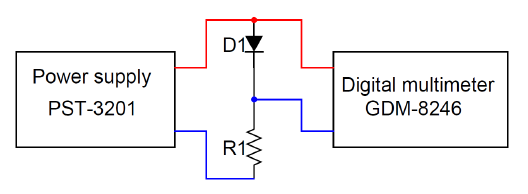

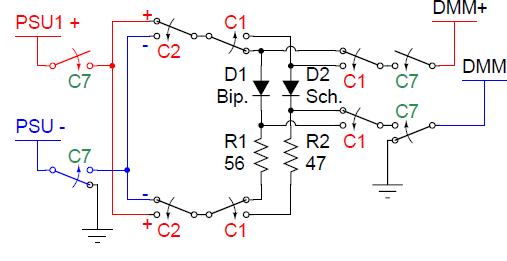

#### 1.2 Procedura de masurare:
Multimetrul măsoară căderea de tensiune pe diodă. Curentul poate fi măsurat indirect,
folosind următoarea formulă (Vpsu reprezintă tensiunea de ieșire a sursei de alimentare):
𝐼𝐷 = (𝑉𝑃𝑆𝑈 − 𝑉𝐷) / 𝑅1


#### 1.3 Codul sursa:
1.3.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [4]:
dmm_handle = connect!("ASRL4::INSTR")
psu_handle = connect!("ASRL5::INSTR")
#fgen = connect!("ASRL1::INSTR")
#scope = connect!("USB0::0x0699::0x0364::C057729::INSTR")
dmm = TIVM.GDM8246(dmm_handle);
psu = TIVM.PST3201(psu_handle);

In [5]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle);

1.3.2 Connfigurarea instrumentelor

In [6]:
# Sursa de tensiune
# C1
set_source_lev(psu, "C1", 0)
set_volt_protection(psu, "C1", 20)
set_max_curr(psu, "C1", 0.5)
# C2
set_source_lev(psu, "C2", 0)
set_volt_protection(psu, "C2", 20)
set_max_curr(psu, "C2", 0.5)
# C3
set_source_lev(psu, "C3", 0)
set_volt_protection(psu, "C3", 20)
set_max_curr(psu, "C3", 0.5)
# Output on
set_outp(psu, "C1", "on") # PST3201 nu poate porni/opri canale individual

# Multimetrul GDM8246
set_sense_func(dmm, "C1", "DCV") # alte functii: ACV, AC+DCV, RIPPLE, OHM
#set_sense_range_auto(dmm, "C1", "on") # autorange
set_sense_range(dmm, "C1", 10) # 10V range

1.3.3 Definirea stimulilor si a variabilelor auxiliare

In [7]:
R1 = 47
volt_step = 0.2
volt_range = volt_step:volt_step:3.0
diode_volt = []
diode_crt = []

Any[]

1.3.4 Bucla de masurare

In [8]:
diode_volt = []
diode_crt = []
for crt_volt in volt_range
    # setare tensiune psu
    set_source_lev(psu, "C1", crt_volt)
    sleep(1) # sursa de tensiune si multimetrul raspund lent la comenzi
    # masurare tensiune cu dmm
    volt_meas = get_primary_measurement(dmm, "C1")
    # calcul curent pe baza formulei
    crt_meas = (crt_volt - volt_meas)/R1
    # adaugarea masuratorilor in vectorii de rezultate
    push!(diode_volt, volt_meas)
    push!(diode_crt, crt_meas)
end

1.3.5 Oprirea instrumentelor

In [9]:
set_outp(psu, "C1", "off") # PST3201 nu poate porni/opri canale individual

1.3.6 Generarea caracteristicii Curent-Tensiune a diodei, dupa incheierea masuratorilor

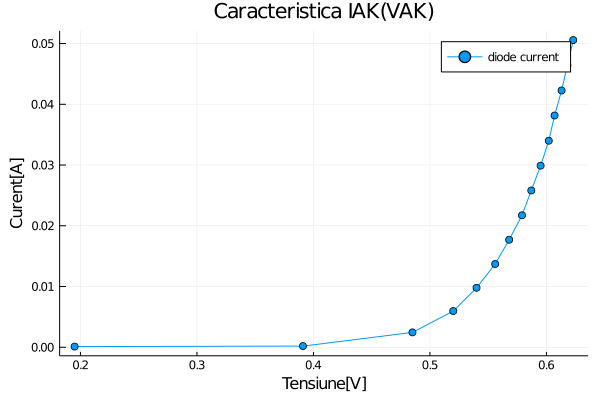

In [10]:
h=plot(diode_volt, diode_crt; markershape=:circle, label="diode current");
title!("Caracteristica IAK(VAK)");
xlabel!("Tensiune[V]");
ylabel!("Curent[A]");
display(h)

1.3.7 Salvarea datelor in fisierul .csv

In [11]:
df = DataFrame("Voltage [V]" => diode_volt, "Current [A]" => diode_crt)
CSV.write("01_dioda.csv", df)
#CSV.write("dioda.csv", (diode_volt = diode_volt, diode_crt = diode_crt); header = ["Voltage [V]", "Current [A]"])

"dioda_df.csv"

1.3.8 Deconectarea instrumentelor

In [ ]:
disconnect!(dmm_handle)
disconnect!(psu_handle)

#### 1.4 Desfasurarea lucrarii:

1. Modificați codul pentru a înlocui variabila "crt_volt" (tensiunea de la ieșirea sursei de alimentare) cu tensiunea măsurată de sursa de alimentare. 
2. Modificați codul pentru a înlocui măsurătoarea indirectă de curent cu curentul măsurat de sursa de alimentare. 
3. Afișati tensiunea de prag a diodei. Indicație: Putem defini pragul diodei ca tensiunea obținută la curentul de 5(10) mA 
4. Opriți execuția programului la depășirea curentului de 10mA. 
5. Modificați pasul sursei de tensiune de la 200mV la 500mV.
6. Determinați rezistența serie a diodei, folsind metoda prezentată în graficul de mai jos. Indicație: Se poate considera că începţnd cu tensiunea de 0.75V caracteristica diodei este influenţată preponderent de rezistenţa serie. Calculul rezistenţei serie se reduce la raportul dintre variaţia tensiunii şi cea a curentului în două puncte (spre exemplu, 0.75V şi 0.85V).

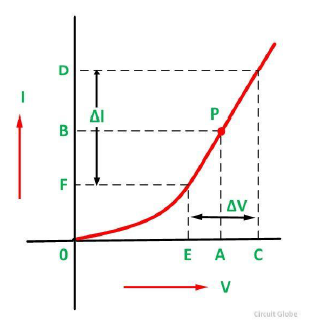